# Amazon Reviews Dataset

*Trang Vu*

### Importing neccassary libraries

In [1]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /Users/trangvuh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/trangvuh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/trangvuh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
#for word embedding
import gensim
from gensim.models import Word2Vec

/Users/trangvuh/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Loading the dataset & EDA

In [4]:
df_train = pd.read_csv('train.csv',header=None)

In [5]:
df_test = pd.read_csv('test.csv',header=None)

In [6]:
# Give a meaningful name for column name
df_train.columns = ['score','tittle','reviews']
df_test.columns  = ['score','tittle','reviews']

In [7]:
# Create target column to classify a negative and positive feedbacks
# we will exclude neutral feedback (score = 3)
df_train['target'] = df_train['score']
df_test['target'] = df_test['score']

df_train.loc[df_train['score'] == 5, 'target'] = 1
df_train.loc[df_train['score'] == 4, 'target'] = 1
#df_train.loc[df_train['score'] == 3, 'target'] = 0
df_train.loc[df_train['score'] == 2, 'target'] = 0
df_train.loc[df_train['score'] == 1, 'target'] = 0
df_train.loc[df_train['score'] == 0, 'target'] = 0

In [8]:
df_train['target'].unique()

array([3, 1, 0])

### Exploratory Data Analysis (EDA)

In [9]:
#pip install -U statsmodels
#pip install --upgrade seaborn
import warnings
warnings.filterwarnings("ignore")

0    1200000
1    1200000
3     600000
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

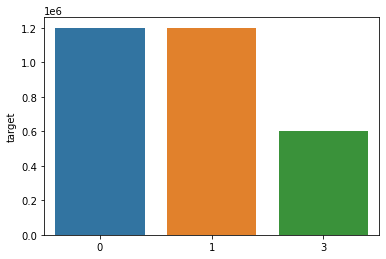

In [10]:
import seaborn as sns
x=df_train['target'].value_counts()
print(x)
sns.barplot(x.index,x)

In [11]:
#checking missing values 
df_train.isna().sum()

score       0
tittle     76
reviews     0
target      0
dtype: int64

**There are 76 missing tittles but 0 missing values for score and reviews.**

In [12]:
#Checking number of words in a review
# WORD-COUNT
df_train['word_count'] = df_train['reviews'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['target']==1]['word_count'].mean()) #Positive reviews
print(df_train[df_train['target']==0]['word_count'].mean()) #Negative reviews

72.13650916666667
77.91565666666666


*The average number of words in a negative reviews is **78** as compared to an average of **72** words in a positive review.*

In [13]:
import matplotlib.pyplot as plt

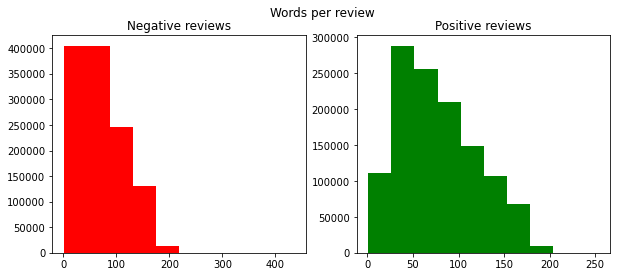

In [14]:
# PLOTTING WORD-COUNT
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Negative reviews')
train_words=df_train[df_train['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Positive reviews')
fig.suptitle('Words per review')
plt.show()

In [15]:
# Check number of character in a review
df_train['char_count'] = df_train['reviews'].apply(lambda x: len(str(x)))
print(df_train[df_train['target']==1]['char_count'].mean()) #Positive reviews
print(df_train[df_train['target']==0]['char_count'].mean()) #Negative reviews

394.56417833333336
425.17876916666665


The average characters in a negative review is **425.178** as compared to an average of **394.56** characters in a positive ones. 

## Word cloud

In [16]:
#conda install -c conda-forge wordcloud=1.6.0 

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df_train.reviews

0          Gave this to my dad for a gag gift after direc...
1          I hope a lot of people hear this cd. We need m...
2          I'm reading a lot of reviews saying that this ...
3          The music of Yasunori Misuda is without questi...
4          Probably the greatest soundtrack in history! U...
                                 ...                        
2999995    The high chair looks great when it first comes...
2999996    I have used this highchair for 2 kids now and ...
2999997    We have a small house, and really wanted two o...
2999998    I agree with everyone else who says this chair...
2999999    not sure what this book is supposed to be. It ...
Name: reviews, Length: 3000000, dtype: object

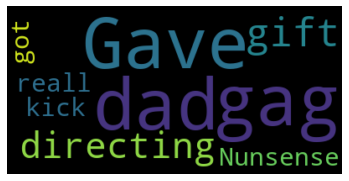

In [19]:
# Start with one review:
text = df_train.reviews[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
is_target =  df_train['target']==1
not_target = df_train['target']==0

In [21]:
negative_top = df_train[not_target].reviews.head(10000)
positive_top = df_train[is_target].reviews.head(10000)

In [22]:
text1 = " ".join(review for review in positive_top)
print ("There are {} words in the combination of all positive review.".format(len(text1)))

There are 4062876 words in the combination of all positive review.


In [23]:
text2 = " ".join(review2 for review2 in negative_top)
print ("There are {} words in the combination of all negative review.".format(len(text2)))

There are 4324498 words in the combination of all negative review.


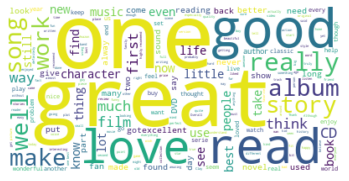

In [24]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["are", "the", "is", "a", "and","but","how","what","will","or","book","product","movie","bought","time"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

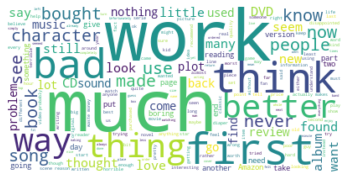

In [25]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["are", "the", "is", "a","even","author","film","well","and","really","make","but","buy","how","what","will","or","book","product","movie","time","story","got","read","good","one","great"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Text preprocessing

Text may contain numbers, special characters, and unwanted spaces.

In [56]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(df_train.reviews.head(30000))):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(df_train.reviews.head(30000)[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different.

#### Converting Text to Numbers - Bag of Words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

we set the max_features parameter to 1500, which means that we want to use 1500 most occurring words as features for training our classifier. 0.7 means that we should include only those words that occur in a maximum of 70% of all the documents. Words that occur in almost every document are usually not suitable for classification because they do not provide any unique information about the document.

In [65]:
stopwords = set(STOPWORDS)
stopwords.update(["are", "the", "is", "a","even","how","what","will","or"])
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.8, stop_words=stopwords)
X = vectorizer.fit_transform(documents).toarray()

#### Finding TFIDF

In [66]:
y = df_train['target'].head(30000)

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

Like any other supervised machine learning problem, we need to divide our data into training and testing sets. To do so, we will use the train_test_split utility from the sklearn.model_selection library. 

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [70]:
y_pred = classifier.predict(X_test)

### Evaluating the model 

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1840  518   11]
 [ 459 1878   19]
 [ 608  628   39]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      2369
           1       0.62      0.80      0.70      2356
           3       0.57      0.03      0.06      1275

    accuracy                           0.63      6000
   macro avg       0.61      0.53      0.48      6000
weighted avg       0.61      0.63      0.56      6000

0.6261666666666666
